In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
wine_data= pd.read_csv('/content/winequality-red.csv')
wine_data.shape

(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
#Statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


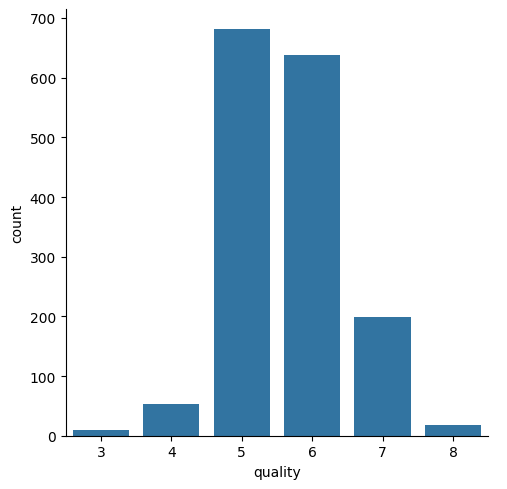

In [9]:
#no of values for each quality
sns.catplot(x= 'quality',data=wine_data,kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

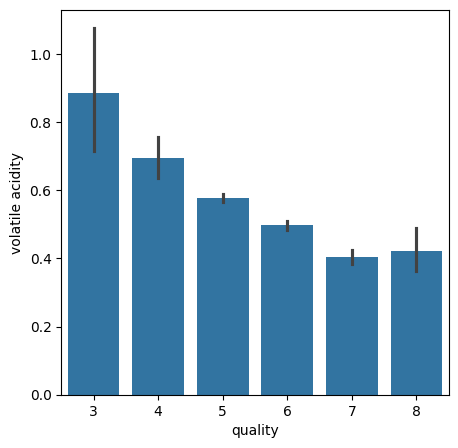

In [11]:
#Volatile acidity vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

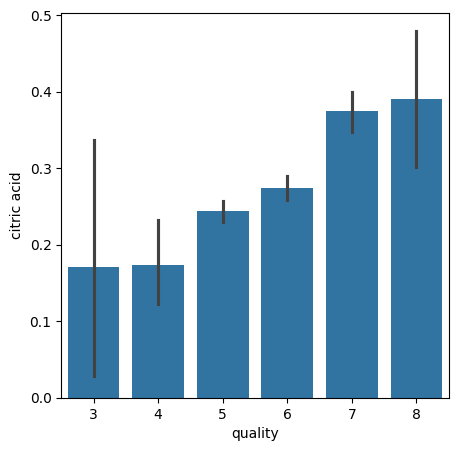

In [12]:
#citric acid vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'citric acid',data=wine_data)

<Axes: xlabel='quality', ylabel='residual sugar'>

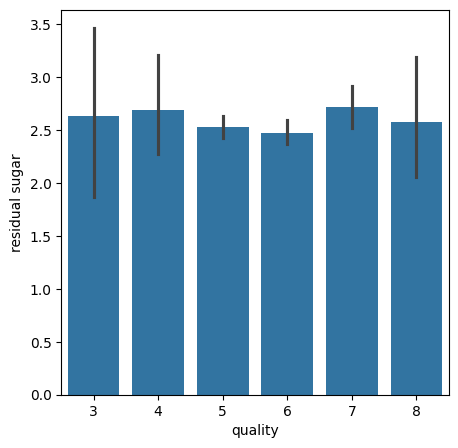

In [13]:
#residual sugar vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'residual sugar',data=wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

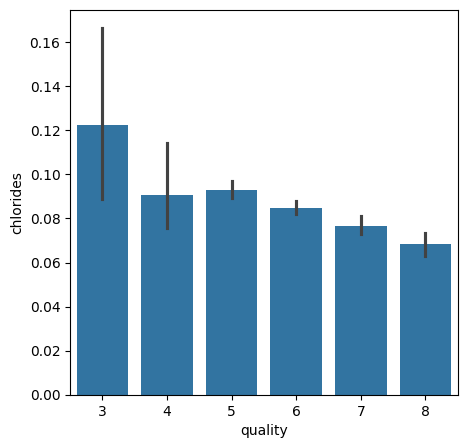

In [15]:
#chlorides vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'chlorides',data=wine_data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

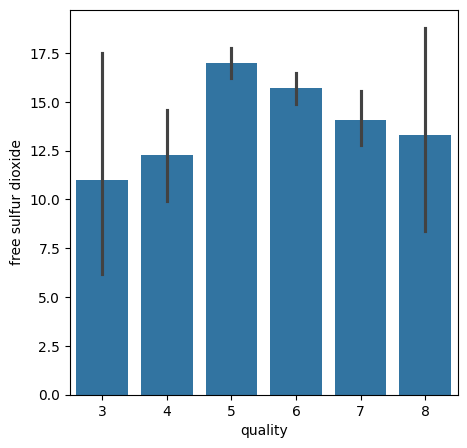

In [16]:
#free sulfur dioxide vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'free sulfur dioxide',data=wine_data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

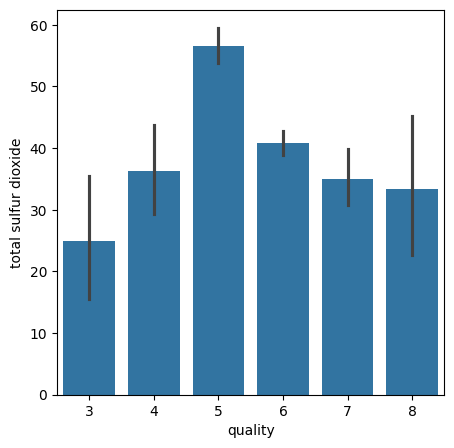

In [17]:
#total sulfur dioxide vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'total sulfur dioxide',data=wine_data)

<Axes: xlabel='quality', ylabel='density'>

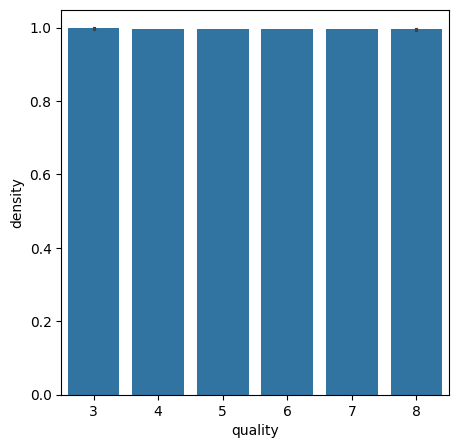

In [18]:
#density vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'density',data=wine_data)

<Axes: xlabel='quality', ylabel='pH'>

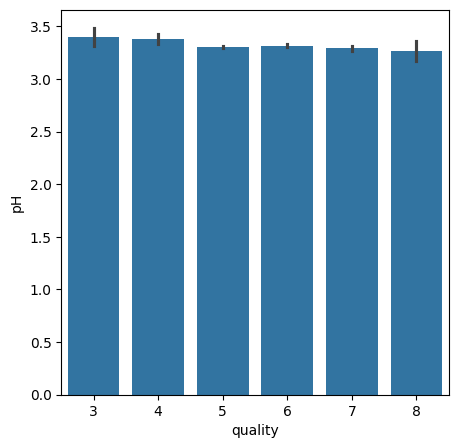

In [19]:
#pH vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'pH',data=wine_data)

<Axes: xlabel='quality', ylabel='sulphates'>

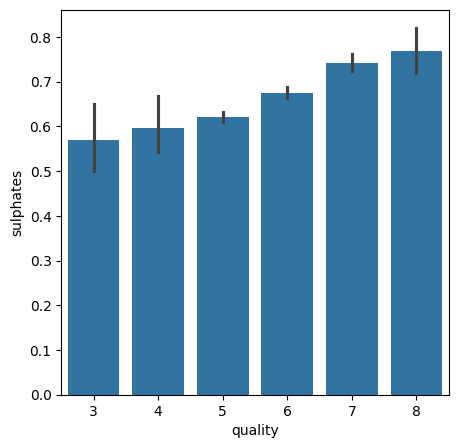

In [20]:
#sulphates vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'sulphates',data=wine_data)

<Axes: xlabel='quality', ylabel='alcohol'>

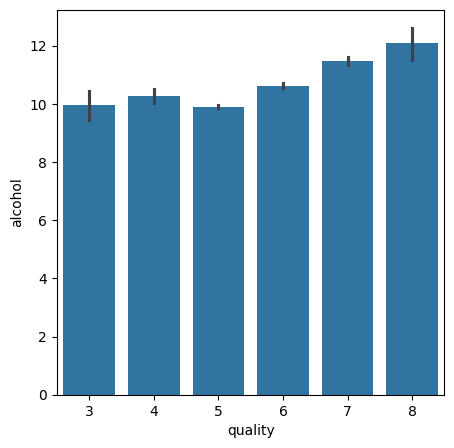

In [21]:
#alcohol vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'alcohol',data=wine_data)

*Correlation*

*Positive correlation*
-*Negative correlation*

In [22]:
correlation= wine_data.corr()

<Axes: >

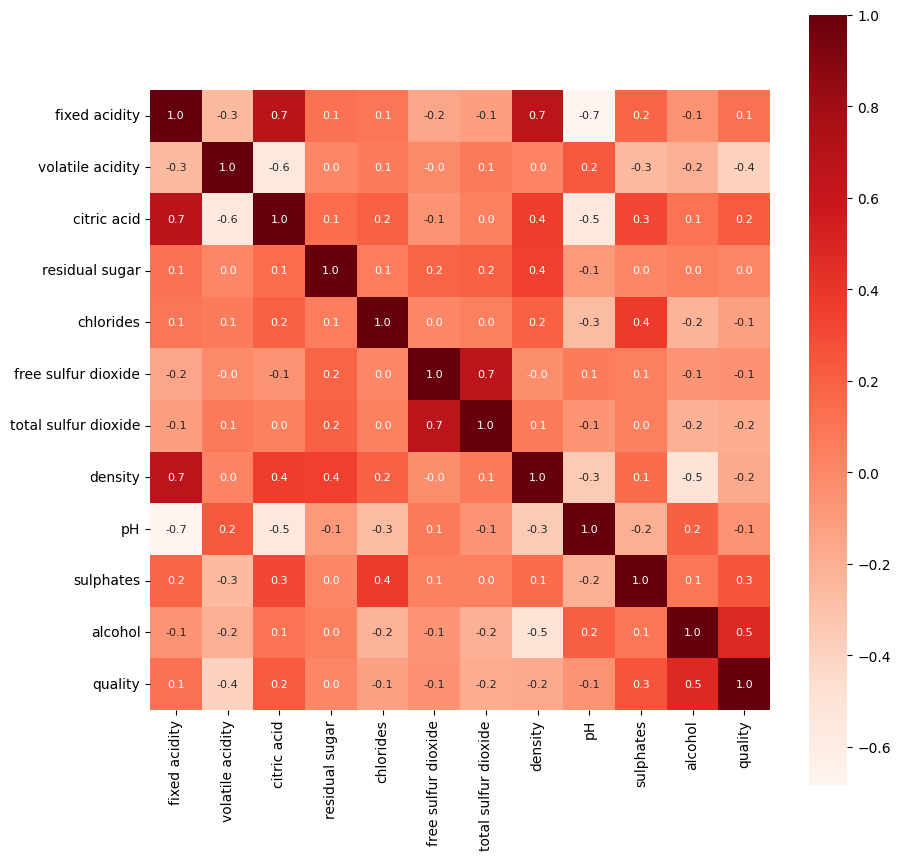

In [23]:
#Constructing a heatmap to understand the correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap = 'Reds')

In [24]:
#Seperate the data and the label
x=wine_data.drop('quality',axis=1)

#Quality label binarization
y= wine_data['quality'].apply(lambda y_value :1 if y_value>=7 else 0)

In [25]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
y

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [27]:
# Train-Test Split between Training + Development vs Test
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Now we have to split between Training vs Development
x_train,x_dev,y_train,y_dev= train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)
print('Training set size: ',x_train.shape)
print('Development set size: ',x_dev.shape)
print('Test set size: ',x_test.shape)

Training set size:  (1023, 11)
Development set size:  (256, 11)
Test set size:  (320, 11)


*Model Training : Random Forest Classifier: It is a ensemble model that uses 2 or more algorithms to predict the model*

In [28]:
model= RandomForestClassifier()

In [29]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
#Predict on thr development set
y_dev_pred= model.predict(x_dev)

#Evaluate the development set (Validation)
print('Accuracy on the development set: ',accuracy_score(y_dev,y_dev_pred))

Accuracy on the development set:  0.9296875


*Building a predictive system*

In [33]:
input_data= (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)    #Getting the input from the dataset (don't in put the last column as it is 'quality')

#Changing the input data into numpy array
numpy_input=np.asarray(input_data)

#Reshape the data as we are predicting the label for only one instance
numpy_input_reshape=numpy_input.reshape(1,-1)

prediction = model.predict(numpy_input_reshape)
print(prediction)

if(prediction[0]==1):
  print('Good Quality wine')
else:
  print('Bad Quality wine')

[1]
Good Quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
